In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
file = pd.read_csv('labelled_dysx.csv')
print('Read file')

FileNotFoundError: [Errno 2] No such file or directory: 'labelled_dysx.csv'

In [4]:
file.head()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2


In [5]:
file.shape

(500, 7)

In [6]:
file.describe()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,0.57800,0.572000,0.576800,0.58260,0.580200,0.581000,1.206000
std,0.20019,0.212382,0.215487,0.21719,0.202163,0.210684,0.642175
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.50000,0.400000,0.500000,0.50000,0.500000,0.500000,1.000000
50%,0.60000,0.600000,0.600000,0.60000,0.600000,0.600000,1.000000
75%,0.70000,0.700000,0.700000,0.70000,0.700000,0.700000,2.000000
max,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


In [5]:
# label 0 - low
# label 1 - Moderate
# label 2 - High
features = ['Language_vocab','Memory','Speed','Visual_discrimination','Audio_Discrimination','Survey_Score']
X = file[features]
y = file['Label']

In [6]:
x_train, x_test,y_train, y_test = train_test_split(X,y, random_state = 1)

In [7]:
x_train.shape

(375, 6)

In [ ]:
# Accuracy =(TP+TN)/(TP+TN+FP+FN)
# Precision = TP/(TP+FP)
# Recall = TP/(TP+FN)
# F1 Score=2*((precision * recall)/(precision +recall)

In [48]:
model = Sequential()
model.add(Dense(12, input_shape=(6,), activation='relu'))
model.add(Dense(1))

In [49]:
model.compile(loss = 'mean_squared_error',
             optimizer = tf.keras.optimizers.Adam(0.1))

In [50]:
training = model.fit(x_train, y_train, epochs = 20, verbose = True)

Epoch 1/20
12/12 [==============================] - 5s 4ms/step - loss: 0.5774
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1002
Epoch 5/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0915
Epoch 6/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0954
Epoch 7/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0892
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0907
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 10/20
12/12 [==============================] - 0s 7ms/step - loss: 0.0957
Epoch 11/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0843
Epoch 12/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 13/20
12/12 [==============================

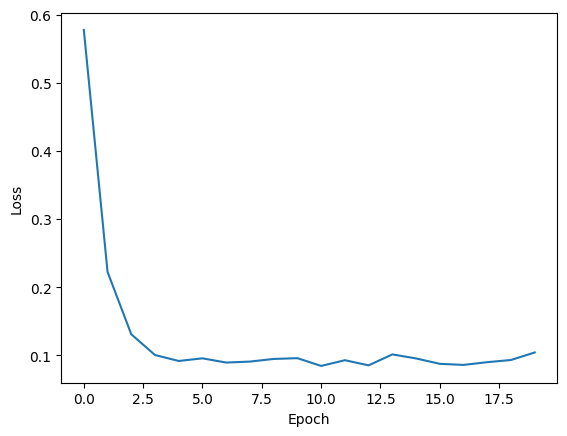

In [51]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(training.history['loss'])

In [52]:
pred = model.predict([x_test]).round()

4/4 [==============================] - 0s 7ms/step


In [53]:
print(accuracy_score(y_test, pred))

0.96


In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.95      0.97      0.96        62
           2       1.00      0.93      0.96        44

    accuracy                           0.96       125
   macro avg       0.95      0.97      0.96       125
weighted avg       0.96      0.96      0.96       125



In [ ]:
#0.3, 0.5, 0.2, 0.1, 0.3, 0.5 and the label will give value 0
lang_vocab = 0.3
memory_score = 0.5
speed_score = 0.2
visual_score = 0.1
audio_score = 0.3 
survey_score = 0.5 
array = np.array([[lang_vocab, memory_score, speed_score,visual_score, audio_score, survey_score]])
label = int(model.predict(array))
print("label ", label)
